In [1]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)
library(kmed)
library(plotly)


Loading required package: spatstat
Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.58-2       (nickname: ‘Not Even Wrong’) 
For an introduction to spatstat, type ‘beginner’ 

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



In [2]:
file = '../../../../../../dataframes/enigh/CONCENTRADOHOGAR/mixed/df_encoding.csv'

In [3]:
#cargar
df <- read.csv(file = file)
data <- df
head(data)

edad_jefe,percep_ing,perc_ocupa,ing_cor,ingtrab,trabajo,sueldos,horas_extr,comisiones,aguinaldo,⋯,p65mas_5,ocupados_0,ocupados_1,ocupados_2,ocupados_3,ocupados_4,ocupados_5,ocupados_6,ocupados_7,ocupados_8
0.2820513,0.2,0.2222222,0.05766597,0.05600359,0.05600359,0.05816475,0,0,0.01599024,⋯,0,0,0,1,0,0,0,0,0,0
0.8333333,0.1,0.0000000,0.03619238,0.00000000,0.00000000,0.00000000,0,0,0.00000000,⋯,0,1,0,0,0,0,0,0,0,0
0.3333333,0.1,0.1111111,0.04818465,0.04162817,0.04162817,0.04333269,0,0,0.01119154,⋯,0,0,1,0,0,0,0,0,0,0
0.3846154,0.1,0.1111111,0.04150861,0.06293463,0.06293463,0.05666460,0,0,0.01717771,⋯,0,0,1,0,0,0,0,0,0,0
0.7307692,0.1,0.0000000,0.08671385,0.00000000,0.00000000,0.00000000,0,0,0.00000000,⋯,0,1,0,0,0,0,0,0,0,0
0.5384615,0.6,0.3333333,0.07702109,0.06981120,0.06046435,0.06298828,0,0,0.01590891,⋯,0,0,0,0,1,0,0,0,0,0


In [4]:
ncol(data)

[1] 203

In [5]:
data <- as.matrix(data)

range_k = 2:10
dunn_kmeans <- c()
set.seed(123)

for (k in range_k) {
  set.seed(123)
  
  kmeans <- stats::kmeans(x = data, centers = k, nstart = 25)
  
  index_internal_kmeans <- clusterCrit::intCriteria(traj = data,
                                                    part = as.integer(kmeans$cluster), 
                                                    crit = "dunn")
  dunn_kmeans[k-1] <- index_internal_kmeans$dunn
}

In [6]:
max(dunn_kmeans)

[1] 0.4735694

Saving 7 x 7 in image


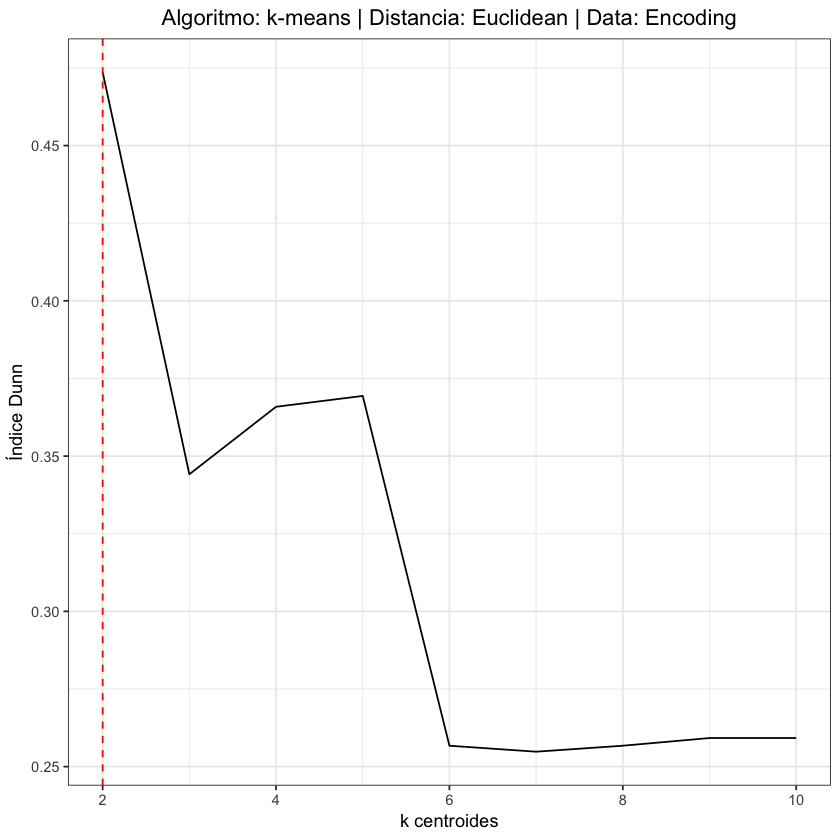

In [7]:
plot_dunn_kmeans <- ggplot2::qplot(x = range_k, 
                                   y = dunn_kmeans, 
                                   geom = 'line', 
                                   main = 'Algoritmo: k-means | Distancia: Euclidean | Data: Encoding', 
                                   xlab = 'k centroides', 
                                   ylab = 'Índice Dunn')


plot_dunn_kmeans  + 
theme_bw() + #ylim(0,0.3) + 
geom_vline(xintercept = range_k[which.max(dunn_kmeans)], linetype = 2, color='red') +
theme(plot.title = element_text(hjust = 0.5)) +
ggsave(filename = "../../../../../../images/enigh/CONCENTRADOHOGAR/dunn_euclidean_encoding.png", dpi = 300)
    

In [8]:
kmeans <- stats::kmeans(x = data, 
                        centers = range_k[which.max(dunn_kmeans)], 
                        nstart = 25)

Saving 7 x 7 in image


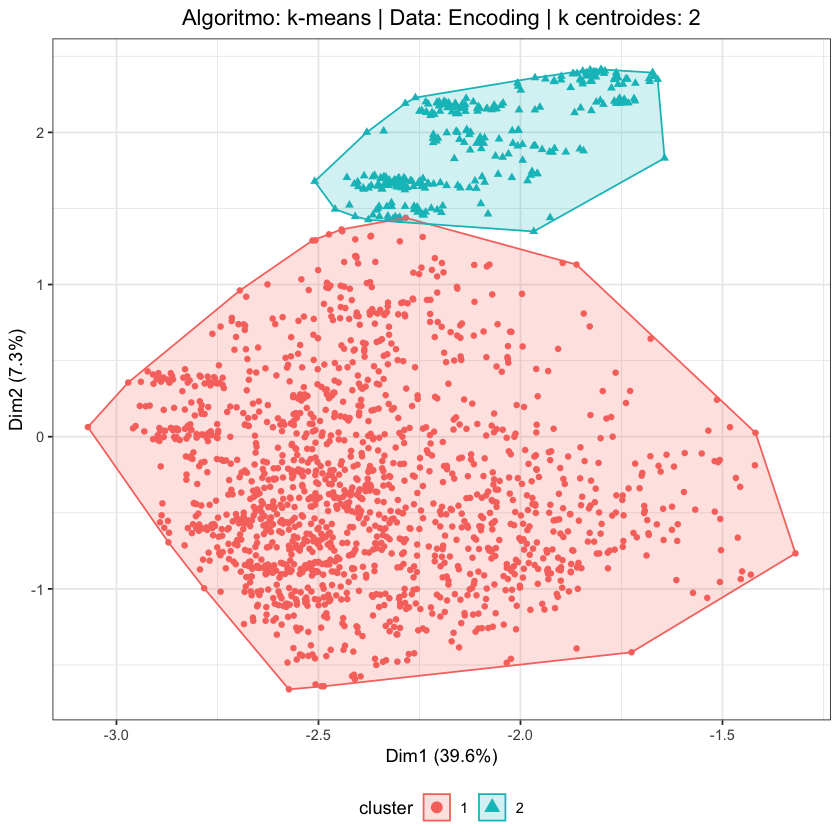

In [9]:
plot_kmeans <- factoextra::fviz_cluster(object = kmeans,
                                        data = data,
                                        stand = F, 
                                        geom =  'point', 
                                        ellipse.type = 'convex',
                                        ellipse = T,
                                        main = paste('Algoritmo: k-means | Data: Encoding | k centroides:', range_k[which.max(dunn_kmeans)]),
                                        outlier.color = 'black',
                                        show.clust.cent = T)

plot_kmeans + 
theme_bw() +
theme(legend.position = 'bottom') + 
theme(plot.title = element_text(hjust = 0.5)) +
ggsave(filename = "../../../../../../images/enigh/CONCENTRADOHOGAR/kmeans_encoding.png", 
       dpi = 300)

In [14]:
file = '../../../../../../dataframes/enigh/CONCENTRADOHOGAR/df_encoding_cluster.csv'


In [15]:
write.csv(kmeans$cluster, 
          file = file,
          row.names=T)


In [10]:
dunn_kmeans

[1] 0.4735694 0.3441504 0.3658800 0.3693769 0.2567333 0.2548075 0.2567333
[8] 0.2592081 0.2592081

In [11]:
file = '../../../../../../dataframes/enigh/CONCENTRADOHOGAR/df_encoding_dunn.csv'


In [12]:
write.csv(dunn_kmeans, 
          file = file,
          row.names=T)
